In [11]:
# Import Packages
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

In [13]:
# Pull in RB data
df1 = pd.read_csv('rushing_data.csv', na_values=r'-')

In [14]:
# Describe the Data
df1.describe()

,YAR,DVOA,VOA,carries,yards,Eyds,TDs,fum,year,yds_per_carry,DYAR_per_carry,Eyds_per_carry,DYAR
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,37.475897,-0.027352,-0.027623,115.930256,488.350769,474.661538,3.330256,1.091282,2014.460513,4.111487,0.246564,3.977436,37.251282
std,79.671768,0.170679,0.169717,82.818108,374.922779,380.833179,3.385507,1.299532,2.847282,0.860526,0.714205,1.218384,82.157443
min,-145.000000,-0.861000,-0.853000,20.000000,43.000000,-31.000000,0.000000,0.000000,2010.000000,1.700000,-3.100000,-1.600000,-169.000000
25%,-9.000000,-0.127500,-0.120500,46.000000,183.000000,167.000000,1.000000,0.000000,2012.000000,3.600000,-0.200000,3.300000,-12.500000
50%,21.000000,-0.028000,-0.027000,89.000000,371.000000,362.000000,2.000000,1.000000,2014.000000,4.100000,0.200000,3.900000,18.000000
75%,70.000000,0.078500,0.075000,172.000000,723.000000,707.500000,5.000000,2.000000,2017.000000,4.600000,0.700000,4.700000,68.500000
max,402.000000,0.736000,0.713000,392.000000,2097.000000,2025.000000,18.000000,8.000000,2019.000000,8.300000,2.900000,8.500000,458.000000


In [15]:
# More info on data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 15 columns):
player            975 non-null object
team              975 non-null object
YAR               975 non-null int64
DVOA              975 non-null float64
VOA               975 non-null float64
carries           975 non-null int64
yards             975 non-null int64
Eyds              975 non-null int64
TDs               975 non-null int64
fum               975 non-null int64
year              975 non-null int64
yds_per_carry     975 non-null float64
DYAR_per_carry    975 non-null float64
Eyds_per_carry    975 non-null float64
DYAR              975 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 114.4+ KB


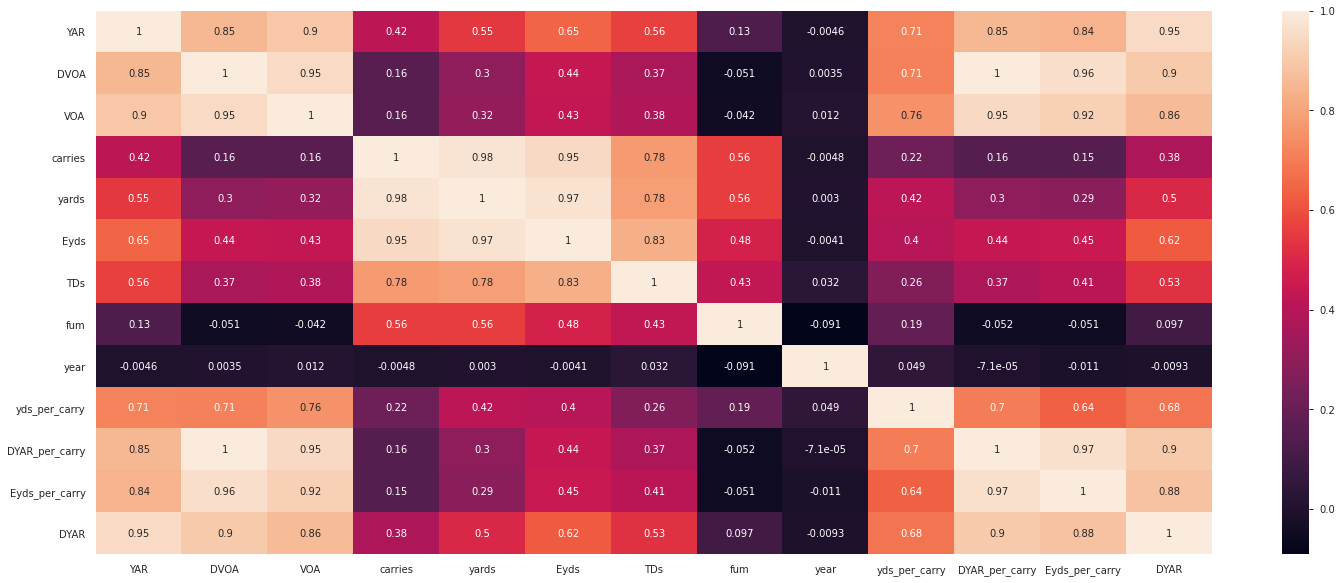

In [16]:
# Correlation Heatmap for the data
spearman =df1.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

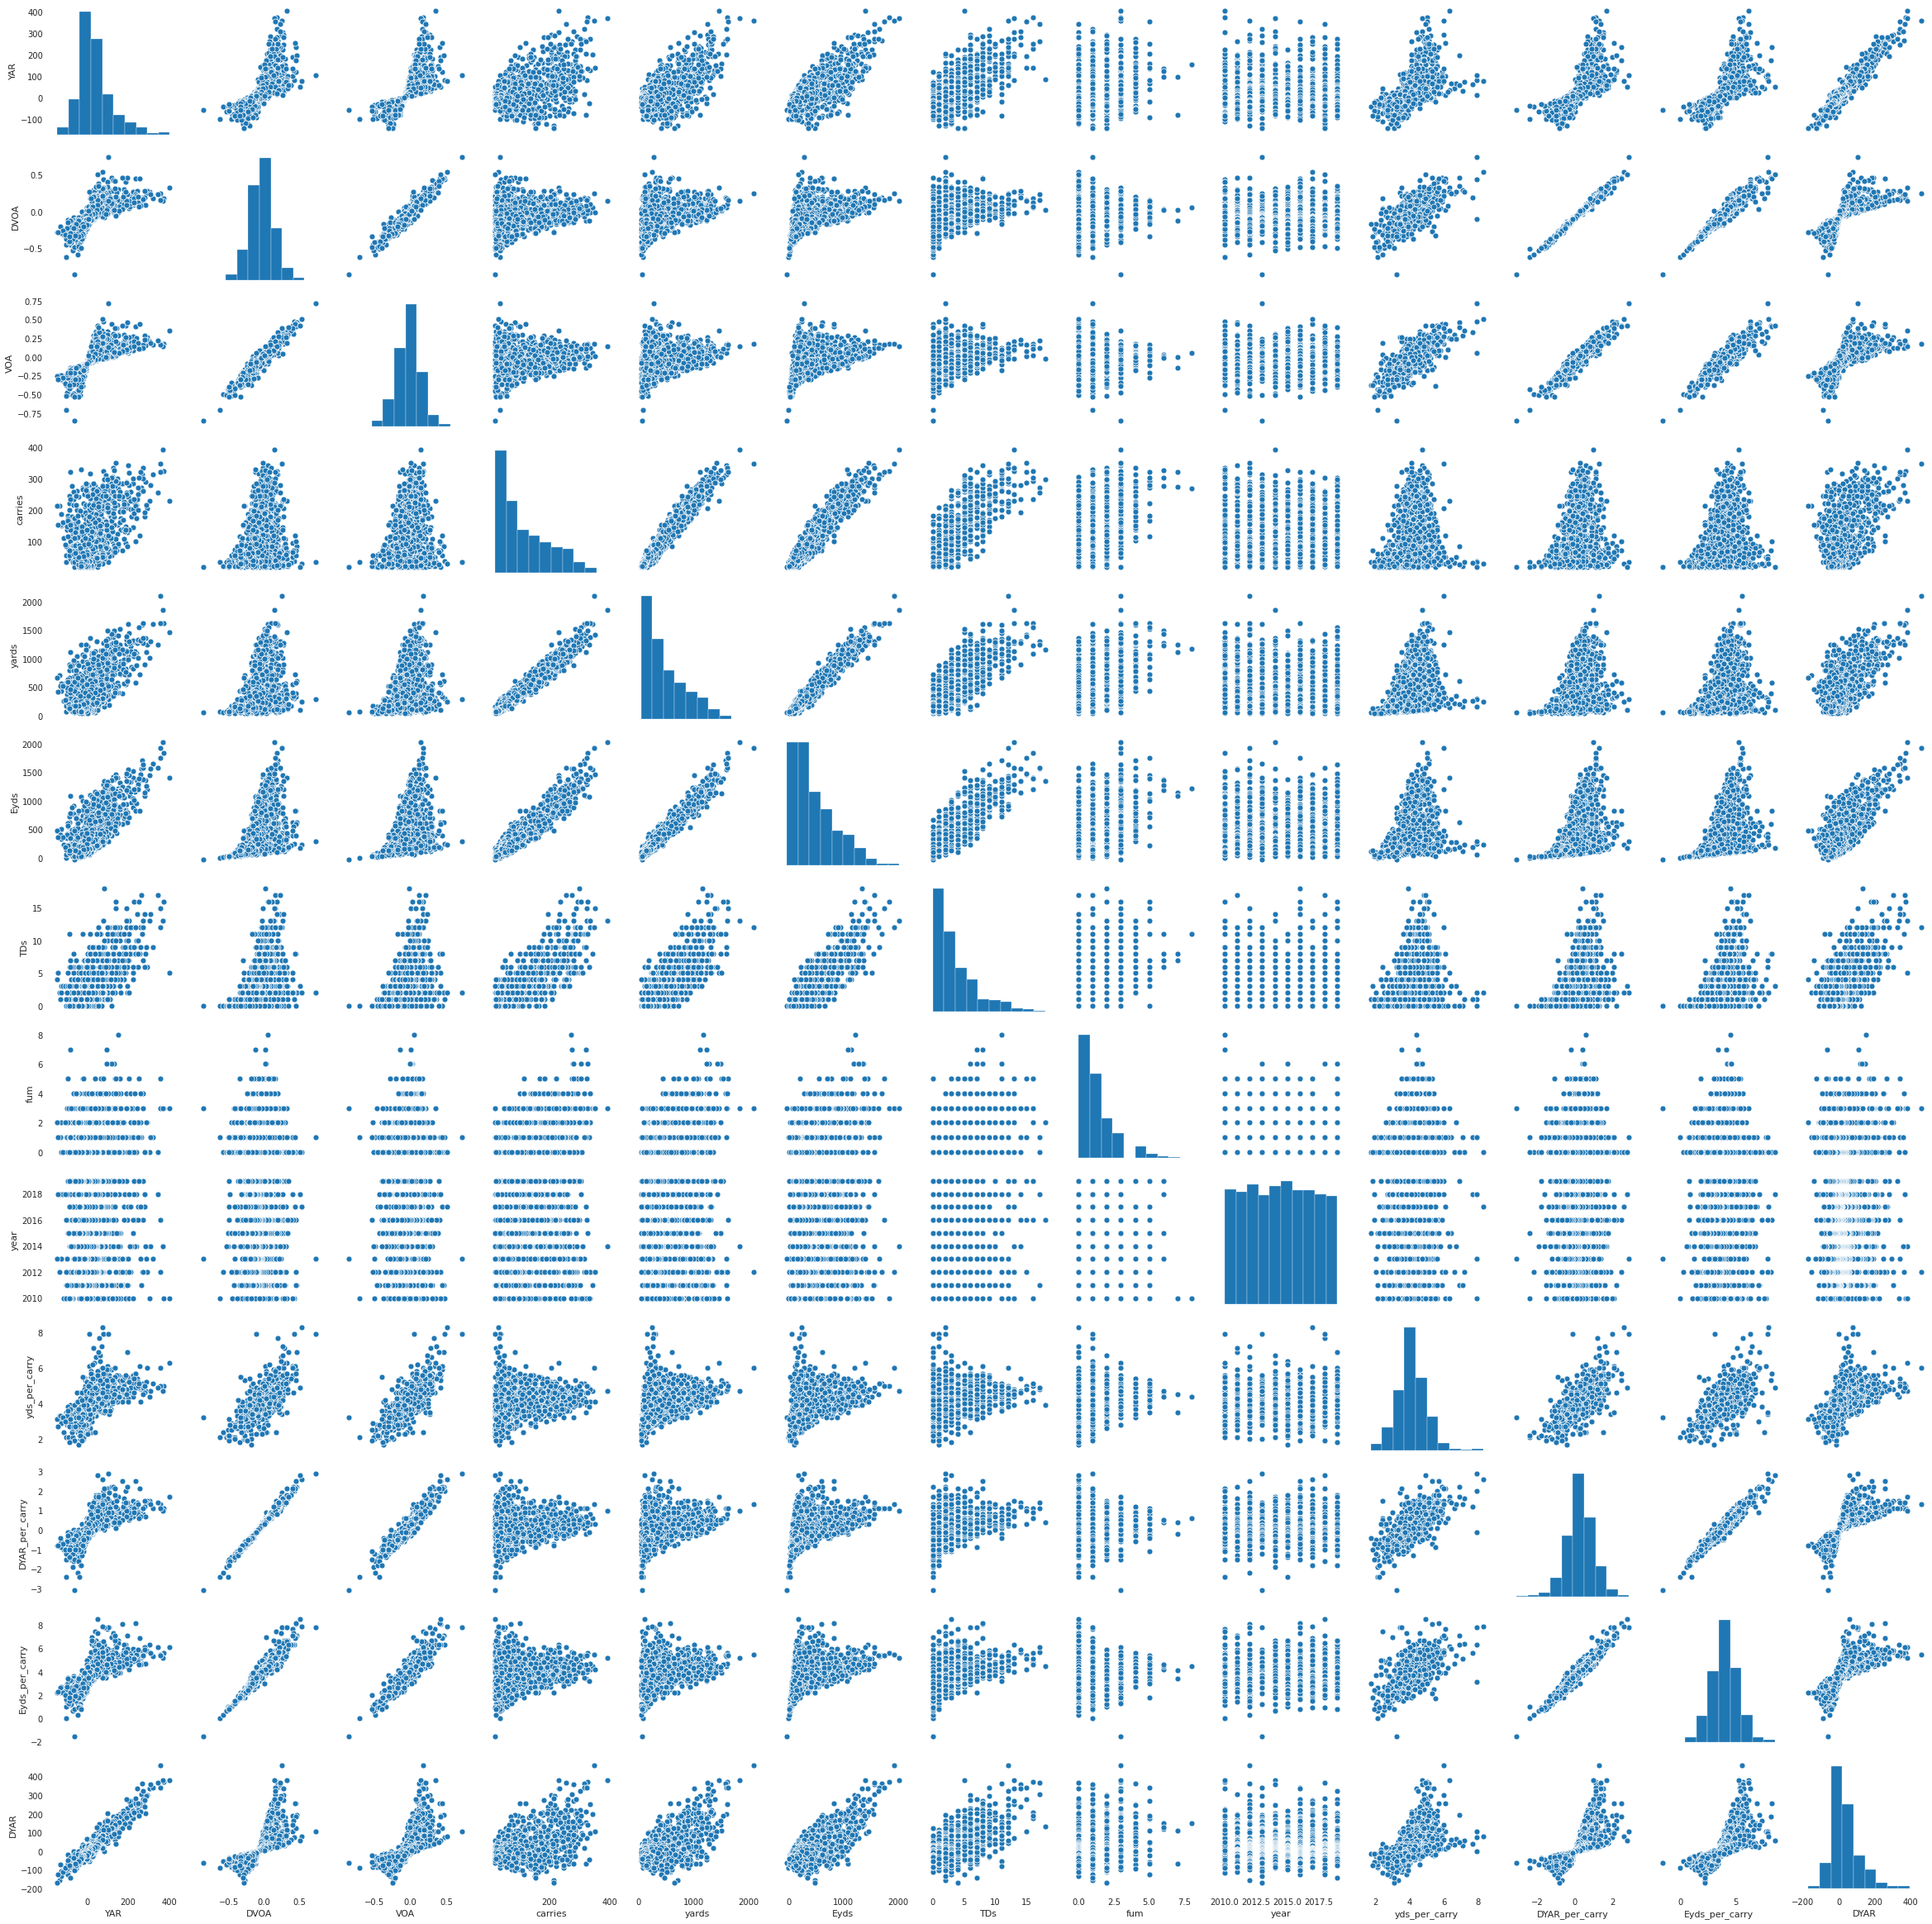

In [7]:
numerical_list=['YAR','DVOA','VOA','carries','yards','Eyds','TDs','fum','year','yds_per_carry','DYAR_per_carry','Eyds_per_carry','DYAR']
sns.pairplot(df1[numerical_list])

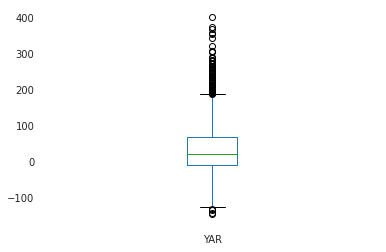

In [17]:
# Add Box Plots to further Describe the Data
# For YAR
df_p=df1.iloc[:,2]
df_p.plot.box()

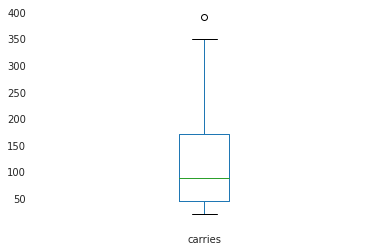

In [18]:
# Add Box Plots to further Describe the Data
# For carries
df_p=df1.iloc[:,5]
df_p.plot.box()

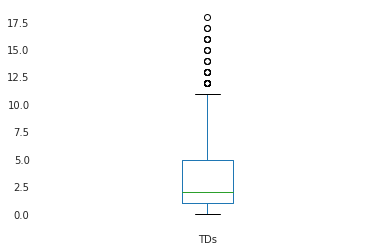

In [19]:
# Add Box Plots to further Describe the Data
# For TDs
df_p=df1.iloc[:,8]
df_p.plot.box()

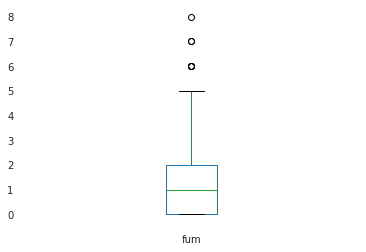

In [20]:
# Add Box Plots to further Describe the Data
# For fum
df_p=df1.iloc[:,9]
df_p.plot.box()

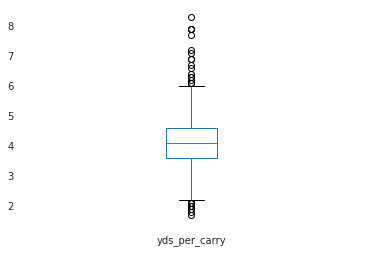

In [21]:
# Add Box Plots to further Describe the Data
# For yds_per_carry
df_p=df1.iloc[:,11]
df_p.plot.box()

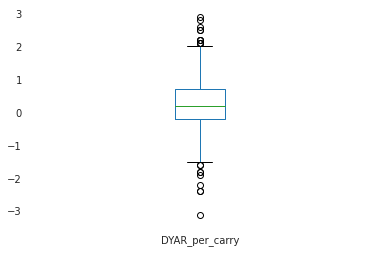

In [22]:
# Add Box Plots to further Describe the Data
# For DYAR_per_carry
df_p=df1.iloc[:,12]
df_p.plot.box()

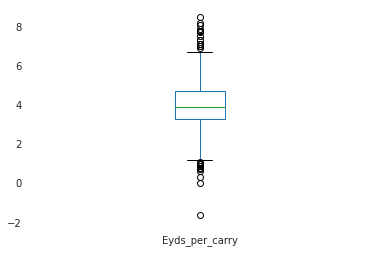

In [23]:
# Add Box Plots to further Describe the Data
# For Eyds_per_carry
df_p=df1.iloc[:,13]
df_p.plot.box()

In [24]:
# check to see if any missing data
display(df1.isna().sum())

player            0
team              0
YAR               0
DVOA              0
VOA               0
carries           0
yards             0
Eyds              0
TDs               0
fum               0
year              0
yds_per_carry     0
DYAR_per_carry    0
Eyds_per_carry    0
DYAR              0
dtype: int64

## Data Prep

In [29]:
# Subsetting the data to be used for modeling
display(df1.dtypes)
df1_list =  df1.columns
df1_list

player             object
team               object
YAR                 int64
DVOA              float64
VOA               float64
carries             int64
yards               int64
Eyds                int64
TDs                 int64
fum                 int64
year                int64
yds_per_carry     float64
DYAR_per_carry    float64
Eyds_per_carry    float64
DYAR                int64
dtype: object

Index(['player', 'team', 'YAR', 'DVOA', 'VOA', 'carries', 'yards', 'Eyds',
       'TDs', 'fum', 'year', 'yds_per_carry', 'DYAR_per_carry',
       'Eyds_per_carry', 'DYAR'],
      dtype='object')

In [30]:
df1_list = df1_list.drop(['DYAR'])

In [31]:
df1_list

Index(['player', 'team', 'YAR', 'DVOA', 'VOA', 'carries', 'yards', 'Eyds',
       'TDs', 'fum', 'year', 'yds_per_carry', 'DYAR_per_carry',
       'Eyds_per_carry'],
      dtype='object')

In [32]:
# # Encode Total_Value before splitting the data to allow for modeling

# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# df1['Total_Value'] = enc.fit_transform(df1['Total_Value'])

In [38]:
# # Splitting the data in to X and y
features=['player', 'team', 'YAR', 'DVOA', 'VOA', 'carries', 'yards', 'Eyds', 'TDs', 'fum', 'year', 'yds_per_carry','DYAR_per_carry', 'Eyds_per_carry']
X=df1[features]
y=df1.DYAR

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)


In [39]:
# print(X_train.shape)

In [40]:
# y_train

Normalization

In [41]:
X_col_list= X.columns.tolist()
X_col_list

['player',
 'team',
 'YAR',
 'DVOA',
 'VOA',
 'carries',
 'yards',
 'Eyds',
 'TDs',
 'fum',
 'year',
 'yds_per_carry',
 'DYAR_per_carry',
 'Eyds_per_carry']

In [42]:
# Subset X between categorical and continuous features

X_continuous = ['YAR','DVOA','VOA','carries','yards','Eyds','TDs','fum','year','yds_per_carry','DYAR_per_carry','Eyds_per_carry']
X_categorical = ['player','team']
X_continuous_df = X.loc[:,X_continuous]
X_categorical_df = X.loc[:,X_categorical]

In [43]:
# Initially displaying the skewness of all attributes
skew_df = pd.DataFrame(X_continuous_df.skew())

#filter skew attributes by absolute values of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_under = skew_df[(skew_df < -0.5).any(axis=1)]
display(skew_over.index)
display(skew_under.index)
total_skew_df = pd.concat([skew_over, skew_under])

skew_cols = total_skew_df.index.tolist()

Index(['YAR', 'carries', 'yards', 'Eyds', 'TDs', 'fum', 'yds_per_carry'], dtype='object')

Index([], dtype='object')

In [44]:
skew_cols

['YAR', 'carries', 'yards', 'Eyds', 'TDs', 'fum', 'yds_per_carry']

In [45]:
# creating the list of cols to adjust for skewness

for i in skew_cols:
    X[i+'_skew'] = X[i]
    
    
cols_to_skew = X.iloc[:,-12:].columns

In [46]:
cols_to_skew

Index(['fum', 'year', 'yds_per_carry', 'DYAR_per_carry', 'Eyds_per_carry',
       'YAR_skew', 'carries_skew', 'yards_skew', 'Eyds_skew', 'TDs_skew',
       'fum_skew', 'yds_per_carry_skew'],
      dtype='object')

In [47]:
# Normalize using quantile_transform for columns that have skewness

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(X[cols_to_skew],random_state=0,copy=True,n_quantiles=50)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
X[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [48]:
display(X[cols_to_skew].skew())

fum                   0.000282
year                  0.008920
yds_per_carry         0.008418
DYAR_per_carry        0.005997
Eyds_per_carry       -0.011261
YAR_skew             -0.001625
carries_skew         -0.008441
yards_skew           -0.002063
Eyds_skew             0.000801
TDs_skew             -0.162546
fum_skew              0.000282
yds_per_carry_skew    0.008418
dtype: float64

In [49]:
# review data types to ensure all data is processed for modeling
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 21 columns):
player                975 non-null object
team                  975 non-null object
YAR                   975 non-null int64
DVOA                  975 non-null float64
VOA                   975 non-null float64
carries               975 non-null int64
yards                 975 non-null int64
Eyds                  975 non-null int64
TDs                   975 non-null int64
fum                   975 non-null float64
year                  975 non-null float64
yds_per_carry         975 non-null float64
DYAR_per_carry        975 non-null float64
Eyds_per_carry        975 non-null float64
YAR_skew              975 non-null float64
carries_skew          975 non-null float64
yards_skew            975 non-null float64
Eyds_skew             975 non-null float64
TDs_skew              975 non-null float64
fum_skew              975 non-null float64
yds_per_carry_skew    975 non-null float64
dtyp

In [50]:
# Encode the categorical variables that remain bool or object for modeling

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X['player'] = enc.fit_transform(X['player'])
X['team'] = enc.fit_transform(X['team'])

In [51]:
X[['player','team']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
player    975 non-null int64
team      975 non-null int64
dtypes: int64(2)
memory usage: 15.4 KB


In [52]:
col_list = X.columns

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 21 columns):
player                975 non-null int64
team                  975 non-null int64
YAR                   975 non-null int64
DVOA                  975 non-null float64
VOA                   975 non-null float64
carries               975 non-null int64
yards                 975 non-null int64
Eyds                  975 non-null int64
TDs                   975 non-null int64
fum                   975 non-null float64
year                  975 non-null float64
yds_per_carry         975 non-null float64
DYAR_per_carry        975 non-null float64
Eyds_per_carry        975 non-null float64
YAR_skew              975 non-null float64
carries_skew          975 non-null float64
yards_skew            975 non-null float64
Eyds_skew             975 non-null float64
TDs_skew              975 non-null float64
fum_skew              975 non-null float64
yds_per_carry_skew    975 non-null float64
dtypes

In [54]:
# resplit based on additional data prep completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) 

In [55]:
#define new dataframe, df_Prepped, which contains all the features, as adjusted per the Data Preparation above, along with the target variables from the initial dataframe

df_Prepped = pd.concat([X,y],axis=1)

#check new dataframe, df_Prepped                
df_Prepped.head()



,player,team,YAR,DVOA,VOA,carries,yards,Eyds,TDs,fum,...,DYAR_per_carry,Eyds_per_carry,YAR_skew,carries_skew,yards_skew,Eyds_skew,TDs_skew,fum_skew,yds_per_carry_skew,DYAR
0,4,27,95,0.022,0.000,275,1243,1137,8,0.994737,...,0.602041,0.561224,0.818983,0.943394,0.950745,0.920854,0.887755,0.994737,0.704082,110
1,7,34,-9,-0.142,-0.114,70,237,230,2,0.000000,...,0.234694,0.255102,0.248777,0.404082,0.324435,0.345660,0.459184,0.000000,0.173469,-14
2,10,14,373,0.180,0.177,325,1617,1832,16,0.897959,...,0.897959,0.918367,0.995880,0.984615,0.986634,0.993639,0.993197,0.897959,0.877551,372
3,17,24,224,0.107,0.102,284,1295,1401,12,0.785714,...,0.806122,0.795918,0.964465,0.959184,0.964608,0.978898,0.979592,0.785714,0.744898,217
4,26,25,304,0.267,0.214,229,1008,1451,13,0.000000,...,0.959184,0.967152,0.986076,0.869048,0.874945,0.981080,0.982993,0.000000,0.663265,335


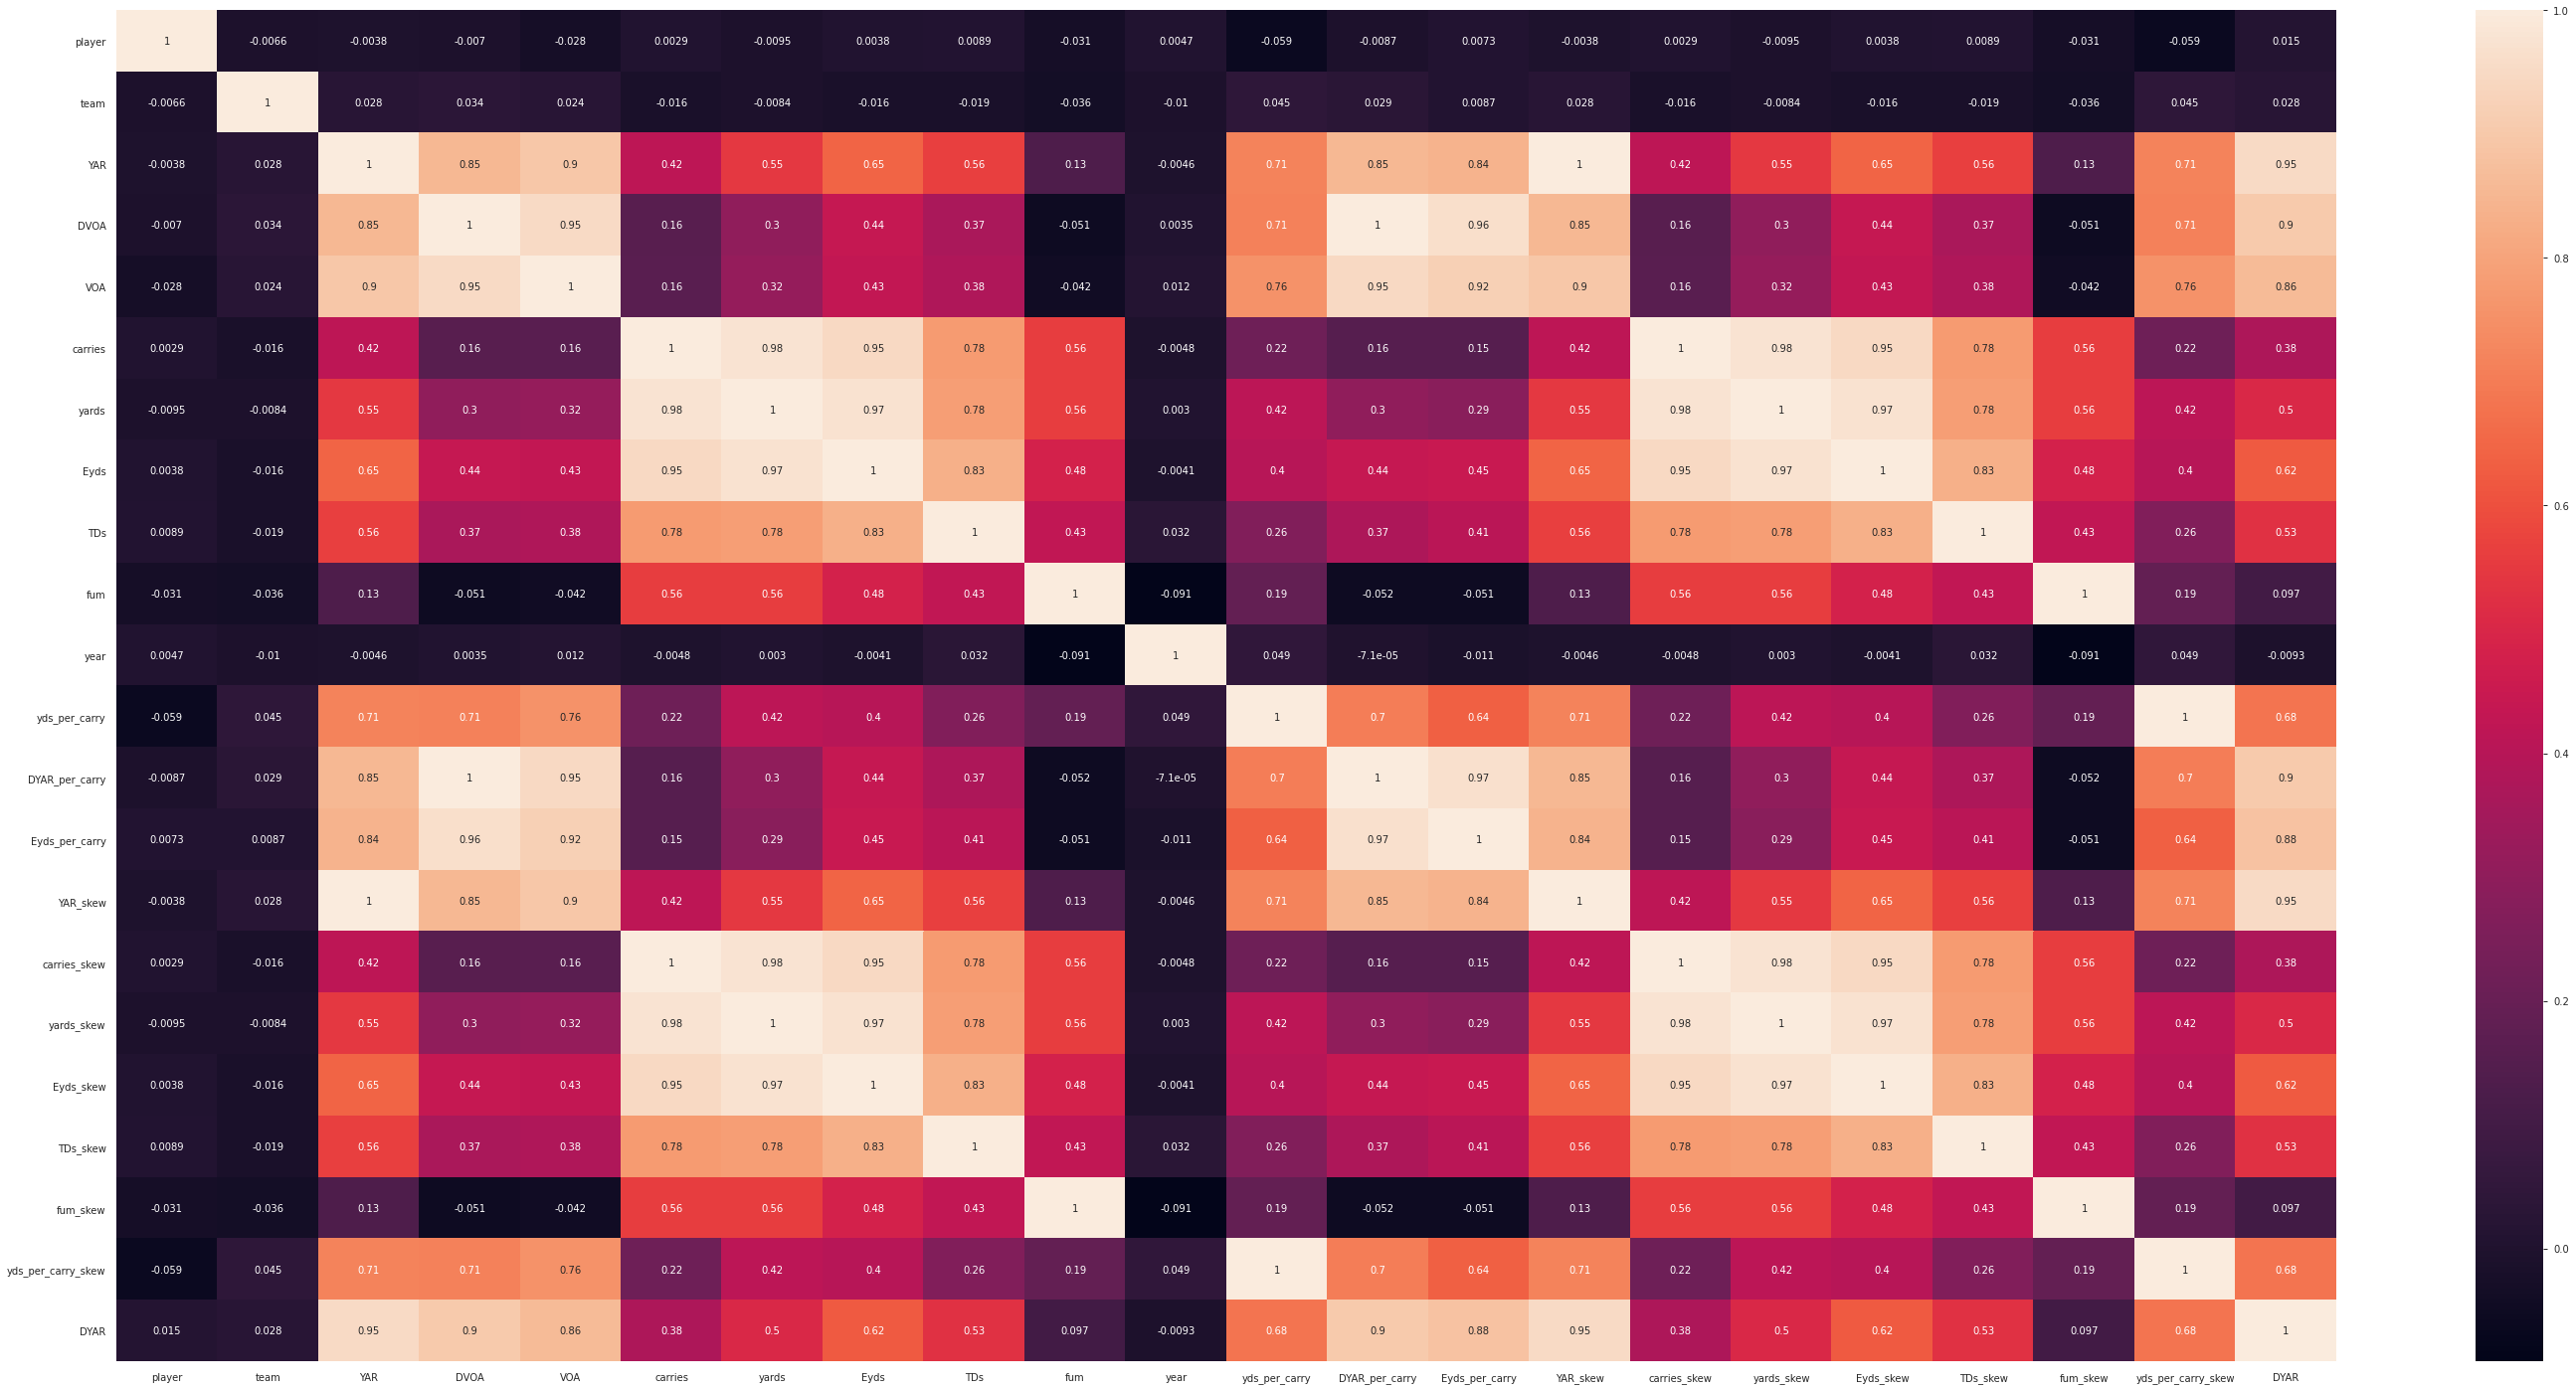

In [56]:
#Correlation Heatmap for the dataframe
spearman =df_Prepped.corr(method ='spearman')
plt.figure(figsize=(50,25))
sns.heatmap(spearman, annot=True)

In [57]:
corr_df = pd.DataFrame(X.corrwith(df_Prepped['DYAR']))

#filter skew attributes by absolute values of 0.5

corr_over = corr_df[(corr_df > 0.09).any(axis=1)]
corr_under = corr_df[(corr_df < -0.09).any(axis=1)]
display(corr_over.index)
display(corr_under.index)

corr_with_df = pd.concat([corr_over, corr_under])

model_cols = corr_with_df.index.tolist()
model_cols

Index(['YAR', 'DVOA', 'VOA', 'carries', 'yards', 'Eyds', 'TDs', 'fum',
       'yds_per_carry', 'DYAR_per_carry', 'Eyds_per_carry', 'YAR_skew',
       'carries_skew', 'yards_skew', 'Eyds_skew', 'TDs_skew', 'fum_skew',
       'yds_per_carry_skew'],
      dtype='object')

Index([], dtype='object')

['YAR',
 'DVOA',
 'VOA',
 'carries',
 'yards',
 'Eyds',
 'TDs',
 'fum',
 'yds_per_carry',
 'DYAR_per_carry',
 'Eyds_per_carry',
 'YAR_skew',
 'carries_skew',
 'yards_skew',
 'Eyds_skew',
 'TDs_skew',
 'fum_skew',
 'yds_per_carry_skew']

In [72]:
# determined possible features list by removing corresponding, duplicative features that were not adjusted for skewness
 
possible_Features_list =['DYAR_per_carry',
'VOA',
 'Eyds_per_carry',
'YAR_skew',
 'carries_skew',
 'yards_skew',
 'Eyds_skew',
 'TDs_skew',
 'fum_skew',
 'yds_per_carry_skew','DYAR']    


In [73]:
#Correlation Heatmap for the dataframe
possible_Corr_df = df_Prepped.loc[:,possible_Features_list]
possible_Corr_df


,DYAR_per_carry,VOA,Eyds_per_carry,YAR_skew,carries_skew,yards_skew,Eyds_skew,TDs_skew,fum_skew,yds_per_carry_skew,DYAR
0,0.602041,0.000,0.561224,0.818983,0.943394,0.950745,0.920854,0.887755,0.994737,0.704082,110
1,0.234694,-0.114,0.255102,0.248777,0.404082,0.324435,0.345660,0.459184,0.000000,0.173469,-14
2,0.897959,0.177,0.918367,0.995880,0.984615,0.986634,0.993639,0.993197,0.897959,0.877551,372
3,0.806122,0.102,0.795918,0.964465,0.959184,0.964608,0.978898,0.979592,0.785714,0.744898,217
4,0.959184,0.214,0.967152,0.986076,0.869048,0.874945,0.981080,0.982993,0.000000,0.663265,335
...,...,...,...,...,...,...,...,...,...,...,...
970,0.122449,-0.365,0.091837,0.055468,0.360544,0.219613,0.209336,0.459184,0.000000,0.051020,-34
971,0.014054,-0.397,0.015800,0.139298,0.043043,0.034294,0.012237,0.285714,0.571429,0.102041,-41
972,0.040816,-0.294,0.035714,0.102041,0.299320,0.223289,0.096475,0.000000,0.000000,0.122449,-52
973,0.040816,-0.304,0.040816,0.070739,0.387755,0.232645,0.161224,0.285714,0.000000,0.051020,-64


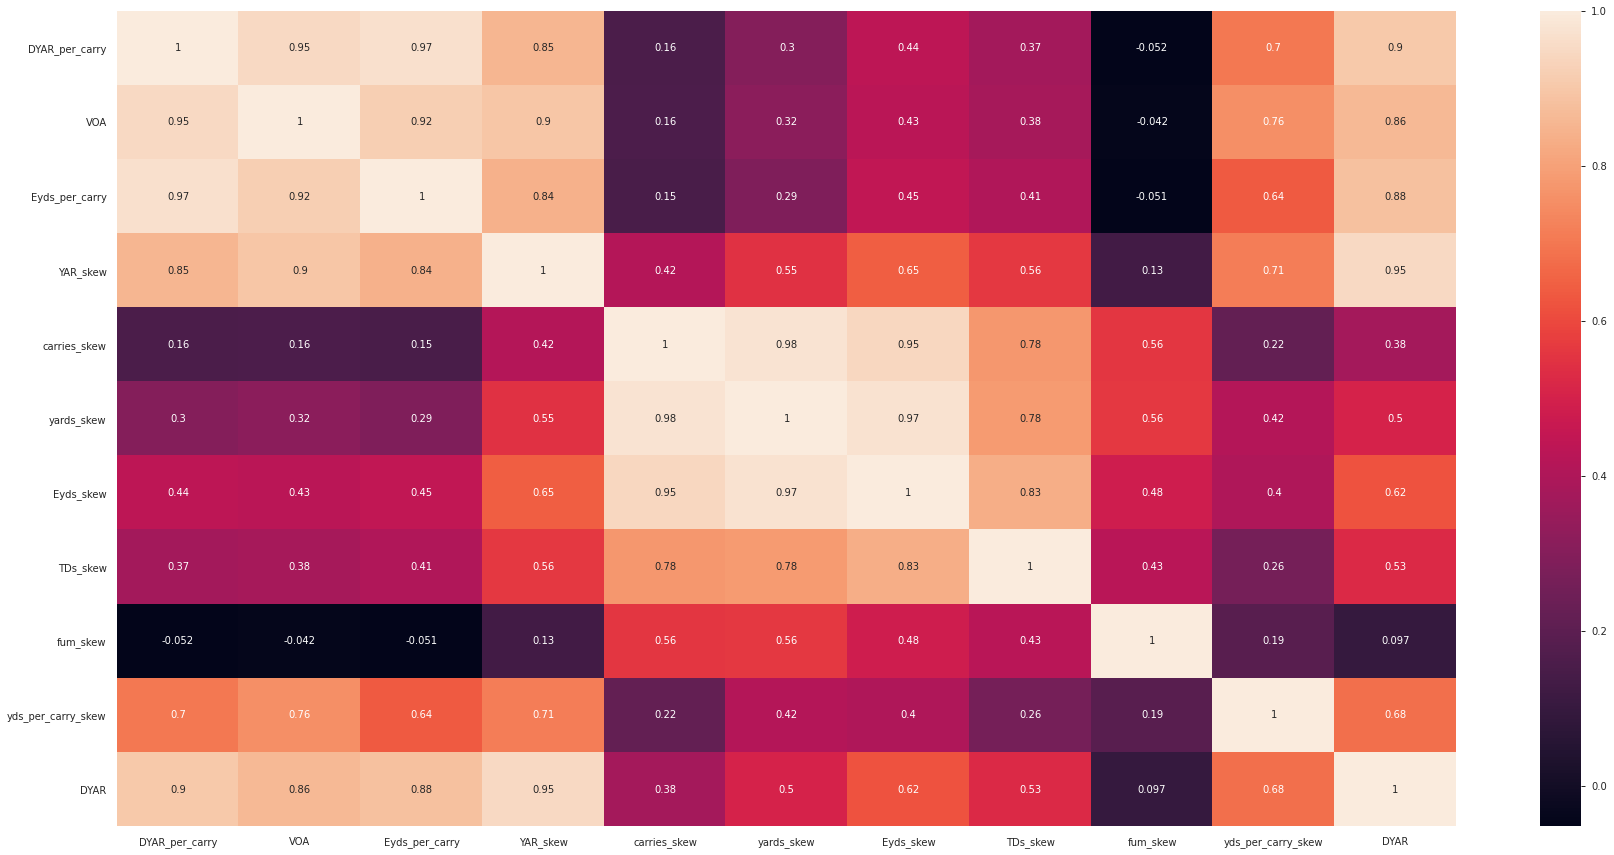

In [74]:
spearman_possible =possible_Corr_df.corr(method ='spearman')
plt.figure(figsize=(30,15))
sns.heatmap(spearman_possible, annot=True)

In [77]:
# Filtered out intercorrelated featues for feature importance
feature_importance_list = ['VOA',
'Eyds_per_carry',
 'carries_skew',
 'yards_skew',
 'Eyds_skew',
 'TDs_skew',
 'fum_skew',
 'yds_per_carry_skew']



In [78]:
# # Split the df_Models dataset
X_Models,y_Models = possible_Corr_df.loc[:,feature_importance_list],possible_Corr_df.iloc[:,-1]

# Set the training at 30% (as above for baseline) given the modest size of the dataset 
X_Models_train, X_Models_test, y_Models_train, y_Models_test = train_test_split(X_Models, y_Models, test_size=0.3,random_state=500) 

#print out the first five rows of the training data
display(X_Models_train.head(),y_Models_train.head())

,VOA,Eyds_per_carry,carries_skew,yards_skew,Eyds_skew,TDs_skew,fum_skew,yds_per_carry_skew
964,-0.168,0.183673,0.374150,0.299525,0.290365,0.000000,0.000000,0.173469
949,-0.003,0.418367,0.448980,0.443590,0.417405,0.459184,0.000000,0.520408
826,-0.137,0.204082,0.647368,0.695892,0.561681,0.459184,0.785714,0.744898
853,0.080,0.653061,0.102041,0.130852,0.169182,0.285714,0.000000,0.520408
528,-0.063,0.306122,0.794218,0.735510,0.728296,0.806122,0.785714,0.255102


964   -23
949    14
826   -27
853    19
528   -29
Name: DYAR, dtype: int64

#### XGBoost Model

In [79]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Step 1: Specify the Model

In [80]:
#Instantiate an XGBoost Classifer Model - for DYAR
XGB_class = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)


Steps 2-4: Generate Test Data, Build the Models & Assess the Models for Total_Value

In [81]:
#Put Data into structure for XGBoost- for DYAR 
data_dmatrix = xgb.DMatrix(data=X_Models,label=y_Models)

#Train the model using the training sets for DYAR
XGB_class.fit(X_Models_train, y_Models_train)

#Predict the response for test dataset for DYAR
y_XGB_pred = XGB_class.predict(X_Models_test)

#Calculate RMSE for DYAR
rmse_XGB = np.sqrt(mean_squared_error(y_Models_test, y_XGB_pred))
print("XGBoost's RMSE for DYAR is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for DYAR
target_range_XGB = y_Models.max() - y_Models.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for DYAR is: %f" % (error_ratio_XGB))

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBoost's RMSE for Total_Value is: 33.190319
XGB target range is: 627.000000
XGBoost's Error Ratio for Total_Value is: 0.052935


#### Regression Model

In [82]:
# Code for feature selection using scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_Models_train,y_Models_train)

feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

0    0.192625
1    0.189581
4    0.136670
7    0.131228
2    0.127112
3    0.123280
6    0.051173
5    0.048331
dtype: float64

In [83]:
X_Models_train.iloc[:,[0,1,4,7,2,3,6,5]].head()

,VOA,Eyds_per_carry,Eyds_skew,yds_per_carry_skew,carries_skew,yards_skew,fum_skew,TDs_skew
964,-0.168,0.183673,0.290365,0.173469,0.374150,0.299525,0.000000,0.000000
949,-0.003,0.418367,0.417405,0.520408,0.448980,0.443590,0.000000,0.459184
826,-0.137,0.204082,0.561681,0.744898,0.647368,0.695892,0.785714,0.459184
853,0.080,0.653061,0.169182,0.520408,0.102041,0.130852,0.000000,0.285714
528,-0.063,0.306122,0.728296,0.255102,0.794218,0.735510,0.785714,0.806122


In [84]:
import statsmodels.api as sm

features=['VOA','Eyds_per_carry','Eyds_skew','yds_per_carry_skew','yards_skew','carries_skew','TDs_skew','fum_skew']
X_imp=possible_Corr_df[features]
y_imp=possible_Corr_df.DYAR

X_train_feat,X_test_feat,y_train_feat,y_test_feat=train_test_split(X_imp,y_imp,test_size=0.25,random_state=2019)

model = sm.OLS(y_train_feat, X_train_feat).fit()
predictions = model.predict(X_Models_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   DYAR   R-squared (uncentered):                   0.704
Model:                            OLS   Adj. R-squared (uncentered):              0.701
Method:                 Least Squares   F-statistic:                              215.2
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                   1.60e-185
Time:                        06:17:02   Log-Likelihood:                         -3879.7
No. Observations:                 731   AIC:                                      7775.
Df Residuals:                     723   BIC:                                      7812.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
VOA                  145.4670     22.941      6.341      0.000     100.428     190.506
Eyds_per_carry       -15.1958     18.112     -0.839      0.402     -50.755      20.363
Eyds_skew            396.0223     65.630      6.034      0.000     267.175     524.870
yds_per_carry_skew   -14.3001     18.733     -0.763      0.446     -51.078      22.478
yards_skew            94.5950     97.940      0.966      0.334     -97.686     286.876
carries_skew        -374.1259     74.257     -5.038      0.000    -519.912    -228.340
TDs_skew              -1.0373     10.513     -0.099      0.921     -21.677      19.602
fum_skew               3.0845      6.269      0.492      0.623      -9.223      15.392
==============================================================================
Omnibus:                      351.961   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2802.282
Skew:                           2.005   Prob(JB):                         0.00
Kurtosis:                      11.714   Cond. No.                         95.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""